In [1]:
%cd ..

/root/autobounds


In [2]:
from autobounds.causalProblem import causalProblem
from autobounds.DAG import DAG

import pandas as pd
import networkx as nx
import plotnine as pn
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def print_bounds(prog_optim):
    print("===========================")
    (
    print(f"Causal effect lies in the interval [{np.round(prog_optim[0]['dual'], 3)}, "
      f"{np.round(prog_optim[1]['dual'], 3)}]")
    )

# Section 1: Data

## 1.1 Story

## 1.2 EDA 

In [4]:
dat = pd.read_csv('replication_files/data/selection_obsqty.csv')

In [5]:
dat

,X,Y,S,prob
0,1,0,1,0.056336
1,0,0,1,0.113749
2,1,1,1,0.064695
3,0,1,1,0.074428


# Section 2: Autobounds analysis

## 2.1 Draw the DAG, define the problem, load the data

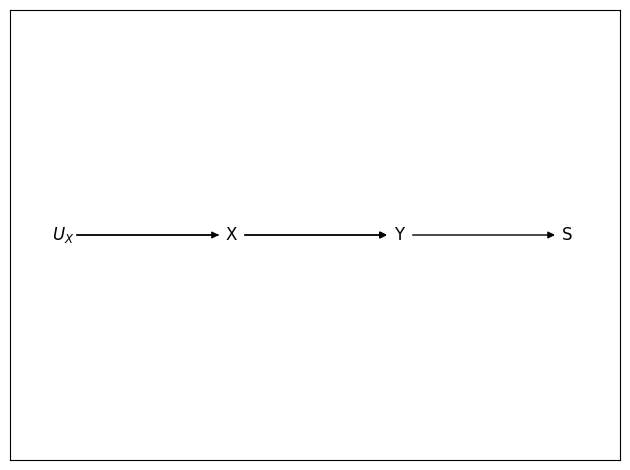

In [6]:
# Loading DAG
dag = DAG()
dag.from_structure("Y -> S, X -> Y, Ux -> X, Ux -> Y", unob = "Ux")
dag.plot()

# Loading causal Problem
problem = causalProblem(dag)

# Adding data
problem.load_data(dat)

## 2.2 Add assumptions 

In [ ]:
# axioms of probability and empirical evidence
problem.add_prob_constraints()

## 2.3 Encode the estimand

In [7]:
problem.set_ate(ind="X", dep="Y")

## 2.4 Run the program

In [11]:
# Generating optimization program
program = problem.write_program()
program_bounds = program.run_scip(filename = 'replication_files/results/selection.csv')
print_bounds(program_bounds)

LOWER BOUND: # -- Primal: -0.5003268 / Dual: -0.5003681 / Time: * 0.1 ##
UPPER BOUND: # -- Primal: 0.6404315 / Dual: 0.6410544 / Time: 0.1 ##
Problem is finished! Returning final values
Problem is finished! Returning final values
CURRENT THRESHOLDS: # -- Theta: 1.1414225 / Epsilon: 0.0005822442843501641 ##
Causal effect lies in the interval [-0.5, 0.64]


# Discussion